In [606]:
#The task here is to predict the quality of red wine on a scale of 0–10 based on set of features as inputs.

In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the data using pandas into a dataframe df
df = pd.read_csv("./winequality-red.csv")

In [608]:
#Input Features
#fixed acidity: most acids involved with wine or fixed or nonvolatile
#volatile acidity: the amount of acetic acid in wine
#citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
#residual sugar: the amount of sugar remaining after fermentation stops
#chlorides: the amount of salt in the wine
#free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
#total sulfur dioxide: amount of free and bound forms of S02
#density: the density of water is close to that of water depending on the percent alcohol and sugar content
#pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
#sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels
#alcohol: the percent alcohol content of the wine.

#Output Variable:

#quality: output variable (based on sensory data, score between 0 and 10)


In [609]:
df.info()
# all the data is having numerical values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [610]:
df.isnull().sum()
#There are no null values in dataset. It's pretty clean dataset. 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [611]:
df.head(3)
#Shows top three rows of dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


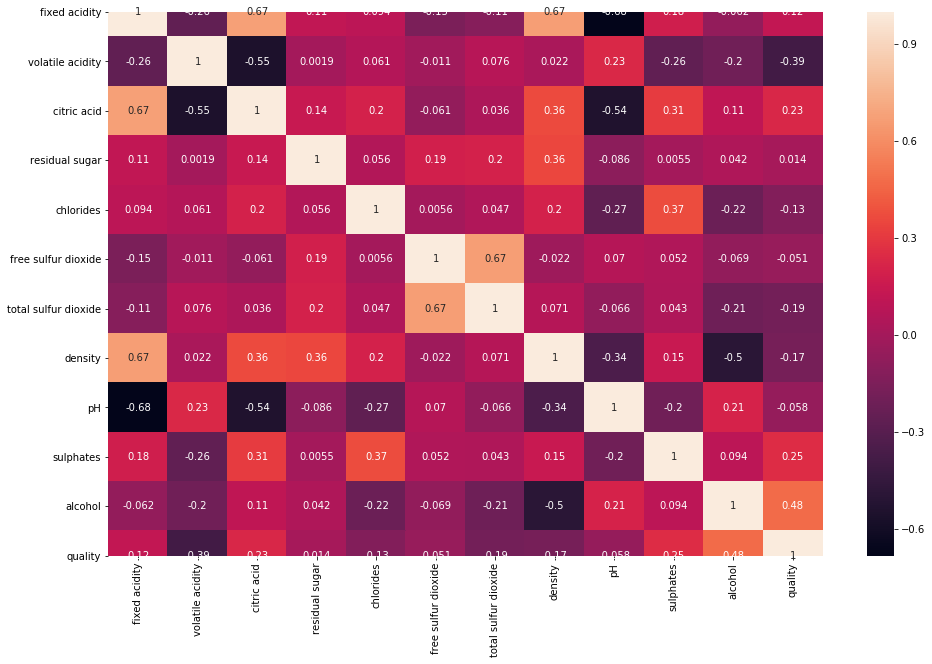

In [612]:
# adjust the width and height of the figure
plt.figure(figsize=(16,10))
# create a heatmap of correlation matrix
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [613]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)
#It is best practise to check which features are more correlated with the target variable. 
#The model will give more reliable output when we pass significant features into the model.

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [614]:
# These are top five features with highest correlation with quality:
#alcohol
#Volatile acidity
#sulphates
#citric acid

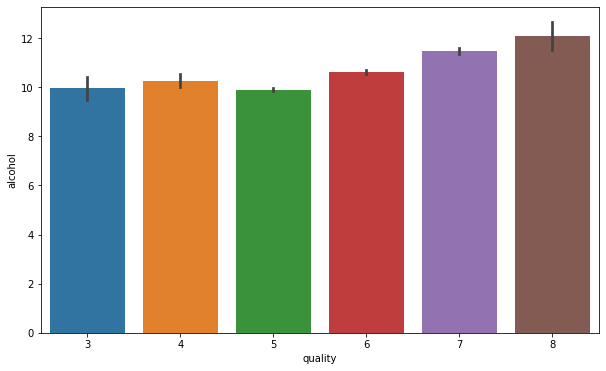

In [615]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data= df)

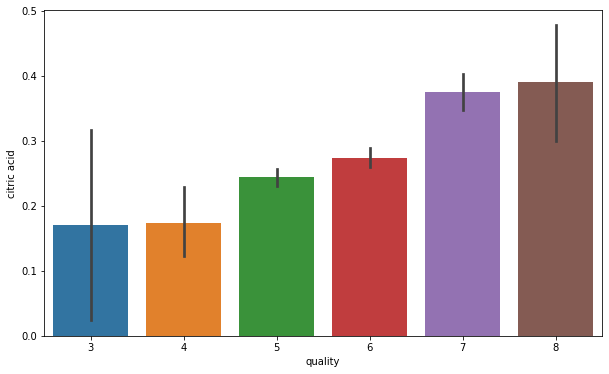

In [616]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data= df)

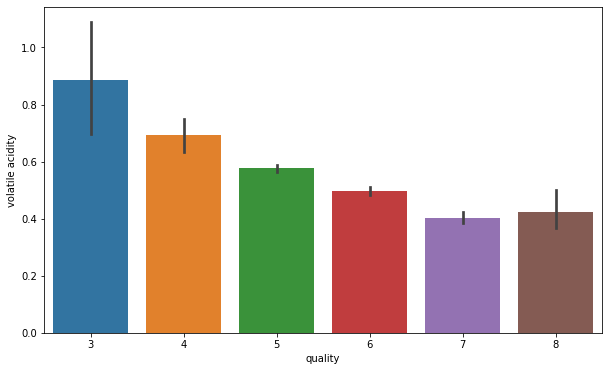

In [617]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data= df)

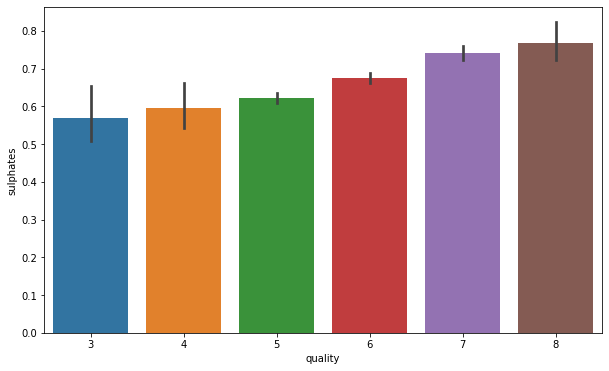

In [618]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data= df)

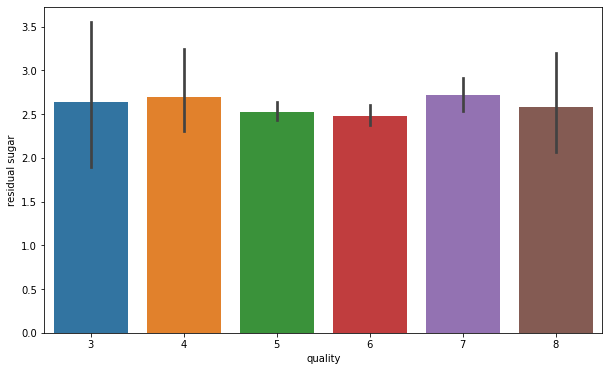

In [619]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data= df)

In [620]:
# Residual Sugar has correlation less that 0.05 with quality. 

In [621]:

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_wine_plots


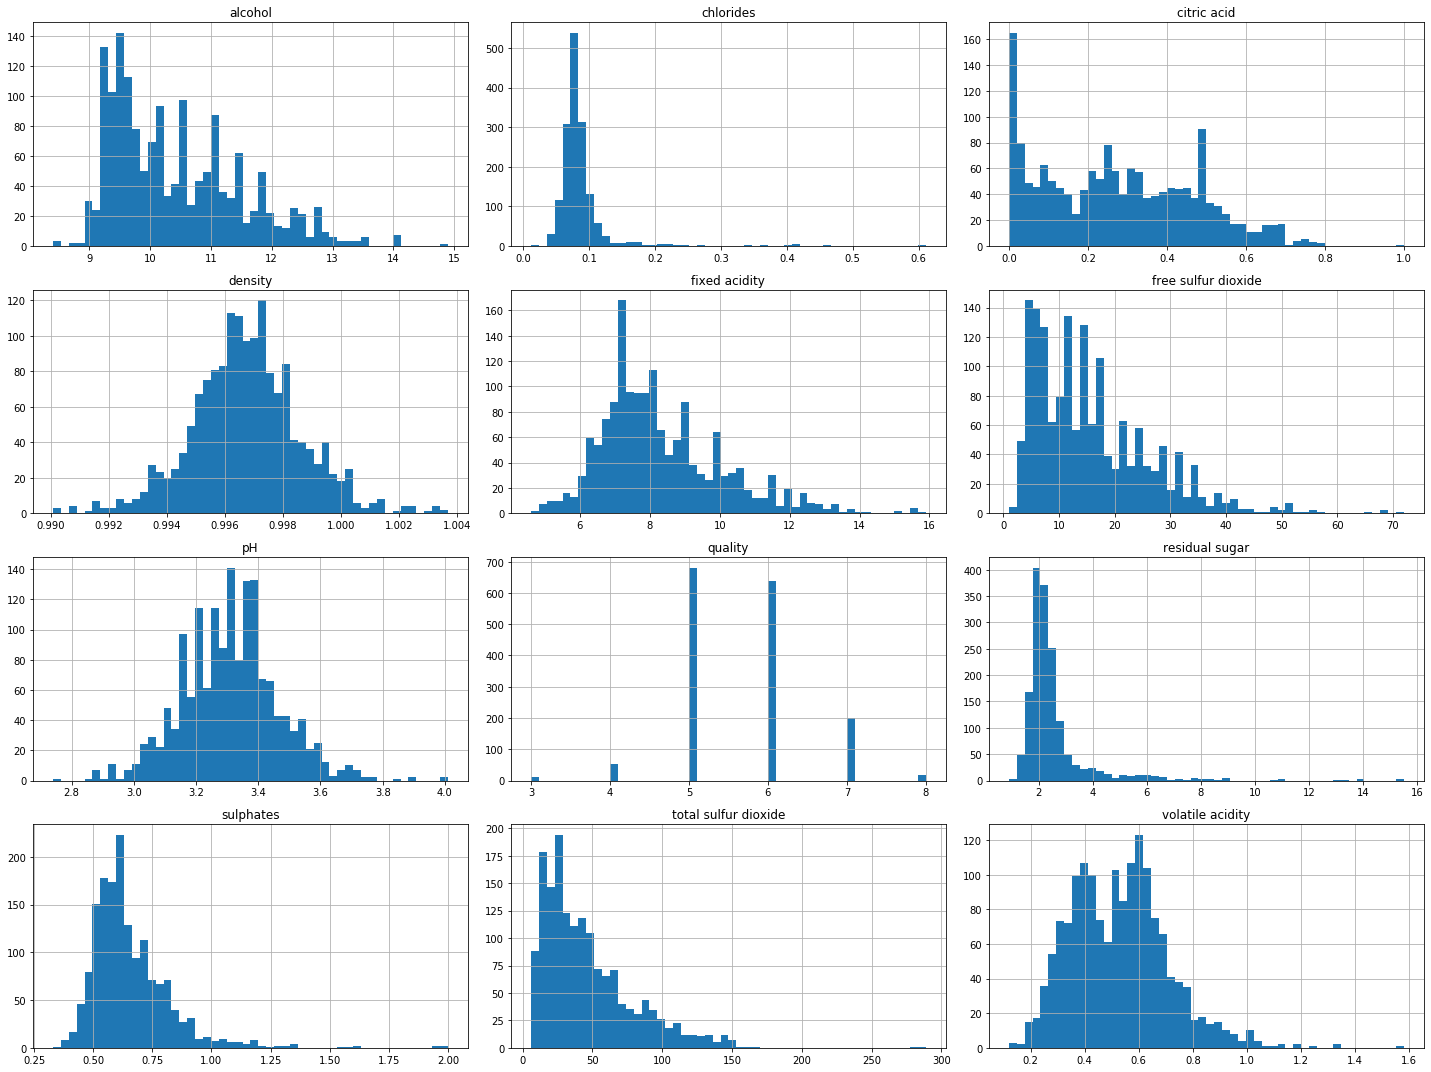

In [622]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_wine_plots")
plt.show()

In [536]:
X = df.drop(['quality'], axis =1).values
y = df['quality'].values.reshape(-1,1)

In [623]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 4)
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (1279, 11)
Shape of y_train:  (1279, 1)
Shape of x_test:  (320, 11)
Shape of y_test:  (320, 1)


In [633]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(X_train)
test_x_scaled = scaler.transform(X_test)

In [634]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [635]:
def linear_regression():
    linear_regression = LinearRegression()
    linear_regression.fit(train_x_scaled, y_train)
    y_test_pred = linear_regression.predict(test_x_scaled)
    print("Linear Regression:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [636]:

def svr():
    svr = SVR(C=3, kernel='rbf')
    svr.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = svr.predict(test_x_scaled)
    print("SVR Regression:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [637]:
def random_forest():
    rf = RandomForestRegressor()
    rf.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = rf.predict(test_x_scaled)
    print("Random Forest:")
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))

In [638]:
linear_regression()
svr()
random_forest()

Linear Regression:
Mean Absolute Error Test: 0.5
Root Mean Squared Error Test: 0.65
SVR Regression:
Mean Absolute Error Test: 0.44
Root Mean Squared Error Test: 0.58
Random Forest:
Mean Absolute Error Test: 0.41
Root Mean Squared Error Test: 0.56


/home/snehal/anaconda3/envs/my_env7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [639]:

#Regression models can be validated using Mean Absolute Error(MAE). 
#The less the mae value the better the model works. From above results we can decide that 
#Random Forest model works better than other models for our data.
#For classification models , we will use accuracy score and confusion matrix to validate across the models. 
#Accuracy score should be high for best results.


In [640]:
estimators = range(100,250,10)
rfr = {}
for i in estimators:
    rf = RandomForestRegressor(n_estimators=i,max_depth=None, max_features = 'auto')
    rf.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = rf.predict(test_x_scaled)
    print("RF for Estimator :",i)
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))
    mae = (round(mean_absolute_error(y_test, y_test_pred),2))
    rfr[i]= mae

RF for Estimator : 100
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 110
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 120
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 130
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 140
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 150
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 160
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 170
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 180
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 190
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 200
Mean Absolute Error Test: 0.4
Root Mean Squared Error Test: 0.55
RF for Estimator : 210
Mea

In [602]:
#Below am going to find the parameter n_estimator, to tune the model for better result. 

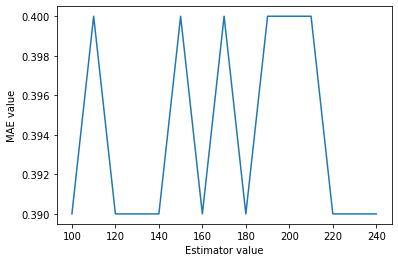

In [642]:
plt.plot(list(rfr.keys()),list(rfr.values()))
plt.xlabel("Estimator value")
plt.ylabel("MAE value")
plt.show()

In [643]:
estimators = range(110,130,5)
rfr = {}
for i in estimators:
    rf = RandomForestRegressor(n_estimators=i,max_depth=None,max_features = 'auto')
    rf.fit(train_x_scaled, np.ravel(y_train))
    y_test_pred = rf.predict(test_x_scaled)
    print("RF for Estimator :",i)
    print('Mean Absolute Error Test:',round(mean_absolute_error(y_test, y_test_pred),2))
    print('Root Mean Squared Error Test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))
    mae = (round(mean_absolute_error(y_test, y_test_pred),2))

    

RF for Estimator : 110
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 115
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
RF for Estimator : 120
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.54
RF for Estimator : 125
Mean Absolute Error Test: 0.39
Root Mean Squared Error Test: 0.55
